### h 구하기 polyfit

In [27]:
# LSTM을 이용하여 Pairs Trading용 Spread 시계열을 예측한다
# ------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MyUtil import YahooData
import pandas_datareader.data as web
import datetime as dt



start= dt.datetime(2007,1,1) #데이터 마지노선
end=dt.date.today()
#주가수정비율 반영 -> adjust_price=True
nx=web.YahooDailyReader('005380.KS',start,end,adjust_price=True).read() #041140
nc=web.YahooDailyReader('000270.KS',start,end,adjust_price=True).read()

# SOIL과 SK이노베이션 주가를 읽어와서 Pairs Trading Spread를 생성한다.
# netmb = YahooData.getStockDataYahoo('251270.KS', '2007-01-01')
# nx = YahooData.getStockDataYahoo('041140.KQ', '2007-01-01')
# netmb = pd.read_pickle('20190220/StockData/010950.KS')
# nx = pd.read_pickle('20190220/StockData/096770.KS')


pair = pd.DataFrame()
pair['nx'] = nx['Close']
pair['nc'] = nc['Close']
pair = pair.dropna()
# pair['netmb']=list(pair['netmb'])
# pair['nx']=list(pair['nx'])

1.4077969571235887


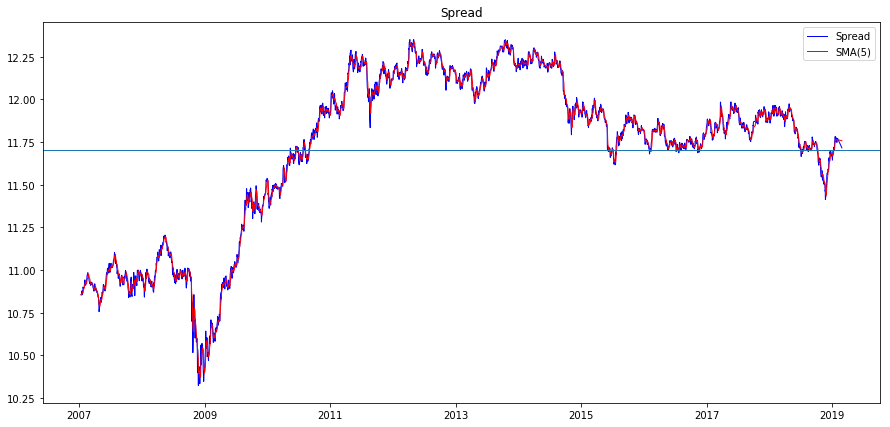

In [12]:
#h계산
h=np.polyfit(np.log(pair['nx']),np.log(pair['nc']),1)
print(h[0]) #기울기만 필요
#스프레드 계산
pair['spread'] = np.log(pair['nx'] - h[0]*np.log(pair['nc']))
# pair['npaA'] = (pair['netmb'] - np.mean(pair['netmb'])) / np.std(pair['netmb'])
# pair['npaB'] = (pair['nx'] - np.mean(pair['nx'])) / np.std(pair['nx'])
# pair['spread'] = pair['npaA'] - pair['npaB']
pair['mspread'] = pair['spread'].rolling(5).mean()
pair = pair.dropna()

# # Normalized 주가를 그린다
# plt.figure(figsize=(8, 3.5))
# plt.plot(pair['npaA'], color='blue', label='SOIL', linewidth=1)
# plt.plot(pair['npaB'], color='red', label='SK Innovation', linewidth=1)
# plt.title('Normalized Price')
# plt.legend()
# plt.show()

# Spread와 Spread의 5-기간 이동평균을 그린다
plt.figure(figsize=(15, 7))
plt.plot(pair['spread'], color='blue', label='Spread', linewidth=1)
plt.plot(pair['mspread'], color='red', label='SMA(5)', linewidth=1)
plt.axhline(y=np.mean(pair['spread']), linewidth=1)
plt.title('Spread')
plt.legend()
plt.show()